In [3]:
import os
from thermof.read import read_log, read_thermo
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
thermo_headers = 'Step Temp Press TotEng E_pair E_mol Fmax Fnorm c_C1[1] c_C1[2] c_C1[3]'
thermo_keys = ['step', 'temp', 'press', 'etotal', 'epair', 'emol', 'fmax', 'fnorm', 'x', 'y', 'z']

In [17]:
scandir = 'data/scan3-y'
scanlist = [os.path.join(scandir, i) for i in os.listdir(scandir)]

In [18]:
data = {'x': [], 'y': [], 'z': [], 'emol': [], 'epair': [], 'etotal': [], 'fmax': [], 'fnorm': [], 'x0': [], 'y0': []}

### Read LAMMPS log files

In [19]:
start_pos = {}
histdata = {'x': [], 'xi': [], 'y': [], 'yi': []}
for simdir in scanlist:
    logfile = os.path.join(simdir, 'log.HtBDC_Cu110')
    try:
        simidx, xi, yi = [int(i) for i in os.path.basename(simdir).split('-')]
        thermo_data = read_log(logfile, headers=thermo_headers)
        thermo = read_thermo(thermo_data, headers=thermo_keys)[0]
        for k in ['x', 'y', 'z', 'epair', 'emol']:
            data[k].append(np.mean(thermo[k]))
        data['x0'].append(thermo['x'][0])
        data['y0'].append(thermo['y'][0])
    except Exception as e:
        print(e, logfile)

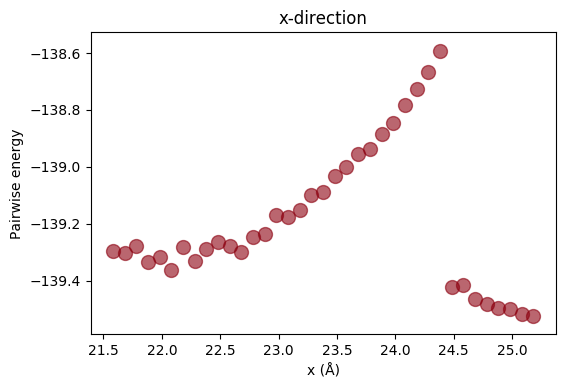

In [16]:
plt.scatter(data['x0'], data['epair'],  c='xkcd:crimson', s=100, alpha=0.6)
# plt.xlim(xlim)
plt.xlabel('x (Å)')
plt.ylabel('Pairwise energy')
plt.title('x-direction')

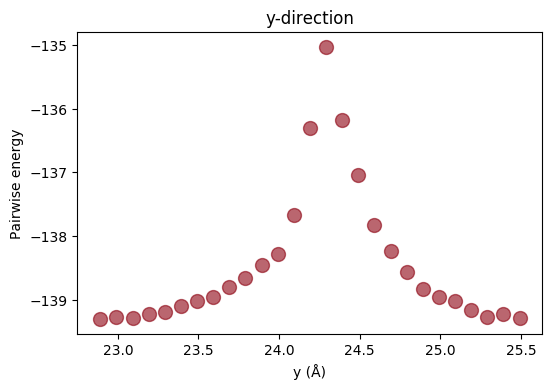

In [22]:
plt.scatter(data['y0'], data['epair'],  c='xkcd:crimson', s=100, alpha=0.6)
# plt.xlim(xlim)
plt.xlabel('y (Å)')
plt.ylabel('Pairwise energy')
plt.title('y-direction')

In [7]:
def plot_2d_hist(pltdata, ax, cmap='RdGy_r'):
    img = ax.imshow(pltdata, origin='lower', cmap=plt.get_cmap(cmap))
    plt.colorbar(img)

In [8]:
def subplot(plot_fun, plot_data, plot_args={}, nrow=1, width=3, height=3, dpi=200, save=None, title=None):
    n_plots = len(plot_data)
    ncol = np.ceil(n_plots / nrow)
    figsize = (ncol * width, nrow * height)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    fig.subplots_adjust(hspace=.5, wspace=.25)
    for idx, data in enumerate(plot_data, start=1):
        plot_args['ax'] = fig.add_subplot(nrow, ncol, idx)
        plot_fun(data, **plot_args)
        if title is not None:
            plt.title(title[idx - 1])
    if save is not None:
        plt.savefig(save, dpi=dpi, transparent=True, bbox_inches='tight')

In [10]:
keys = ['emol', 'epair', 'etotal', 'z', 'fmax', 'fnorm', 'dx', 'dy']
keys = ['emol', 'epair', 'z']
# keys = ['emol', 'epair', 'dx', 'dy']
pltdata = [matrixdata[i].T for i in keys]

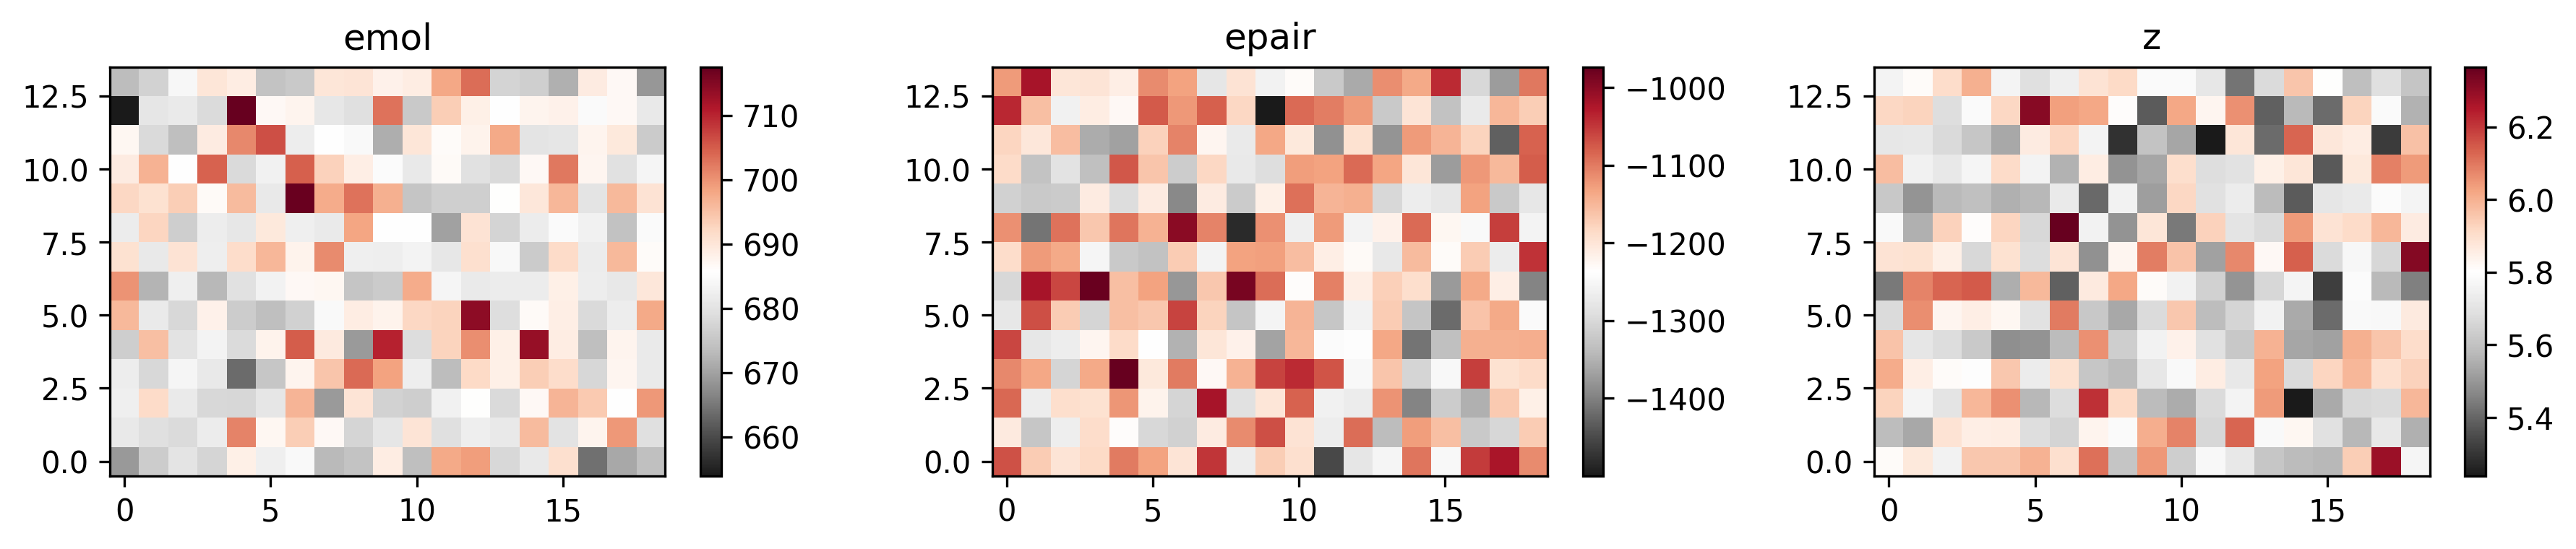

In [11]:
subplot(plot_2d_hist, pltdata, nrow=1, height=2.5, width=4.9, title=keys, dpi=300)

In [12]:
surfatoms1 = [[21.582, 22.8912], [25.179, 22.8912], [21.582, 25.4346], [25.179, 25.4346]]
surfatoms2 = [23.3805, 24.1629]
def get_numbins(data, binsize):
    return abs(max(data) - min(data)) / binsize

### Distance histograms

In [19]:
from scipy.stats import norm
import matplotlib.mlab as mlab


def plot_hist(data, bins=50, color='b', linestyle='k', alpha=0.7, lw=1.5):
    (mu, sigma) = norm.fit(data)
    # the histogram of the data
    n, bins, patches = plt.hist(data, bins, normed=1, facecolor=color, alpha=alpha)
    # add a 'best fit' line
    y = mlab.normpdf(bins, mu, sigma)
    l = plt.plot(bins, y, linestyle, linewidth=lw)
    plt.scatter(data[0], max(y), c='k')

In [20]:
histdata = {'allx': np.zeros(14), 'x': [], 'xi': [], 'y': [], 'yi': []}

In [26]:
for simdir in scanlist:
    logfile = os.path.join(simdir, 'log.HtBDC_Cu110')
    _, xi, yi = [int(i) for i in os.path.basename(simdir).split('-')]
    if yi == 1:
        thermo_data = read_log(logfile, headers=thermo_headers)
        thermo = read_thermo(thermo_data, headers=thermo_keys)[0]
        histdata['x'].append(thermo['x'])
        histdata['xi'].append(xi)
    if xi == 1:
        thermo_data = read_log(logfile, headers=thermo_headers)
        thermo = read_thermo(thermo_data, headers=thermo_keys)[0]
        histdata['y'].append(thermo['y'])
        histdata['yi'].append(yi)  

In [22]:
def subplot(plot_fun, plot_args, nrow=1, width=3, height=3, dpi=200, save=None, title=None):
    n_plots = len(plot_data)
    ncol = np.ceil(n_plots / nrow)
    figsize = (ncol * width, nrow * height)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    fig.subplots_adjust(hspace=.5, wspace=.25)
    for idx, data in enumerate(plot_data, start=1):
        ax = fig.add_subplot(nrow, ncol, idx)
        plot_fun(**plot_args)
        if title is not None:
            plt.title(title[idx - 1])
    if save is not None:
        plt.savefig(save, dpi=dpi, transparent=True, bbox_inches='tight')

### Molecule y-position histogram

(0, 1.5)

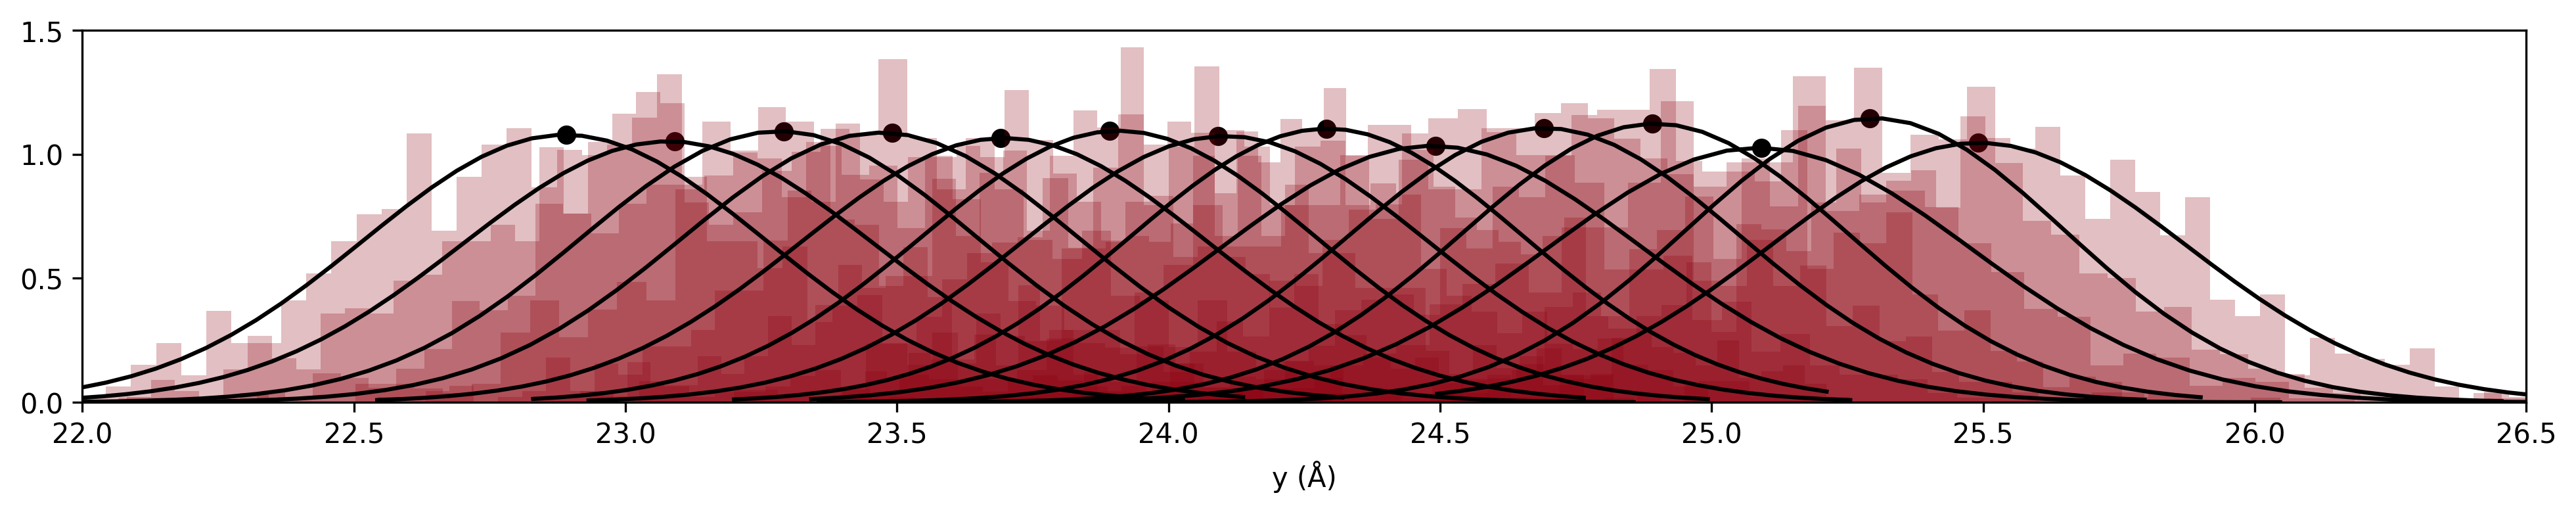

In [39]:
fig = plt.figure(figsize=(16, 2.5), dpi=300)
for i in range(14):
    idx = histdata['yi'].index(i)
    plot_hist(histdata['y'][idx], alpha=0.25, color='xkcd:crimson')
plt.xlabel('y (Å)')
plt.yticks([0, 0.5, 1.0, 1.5])
plt.xlim(22, 26.5)
plt.ylim(0, 1.5)

### Molecule x-position histogram

(0, 1.5)

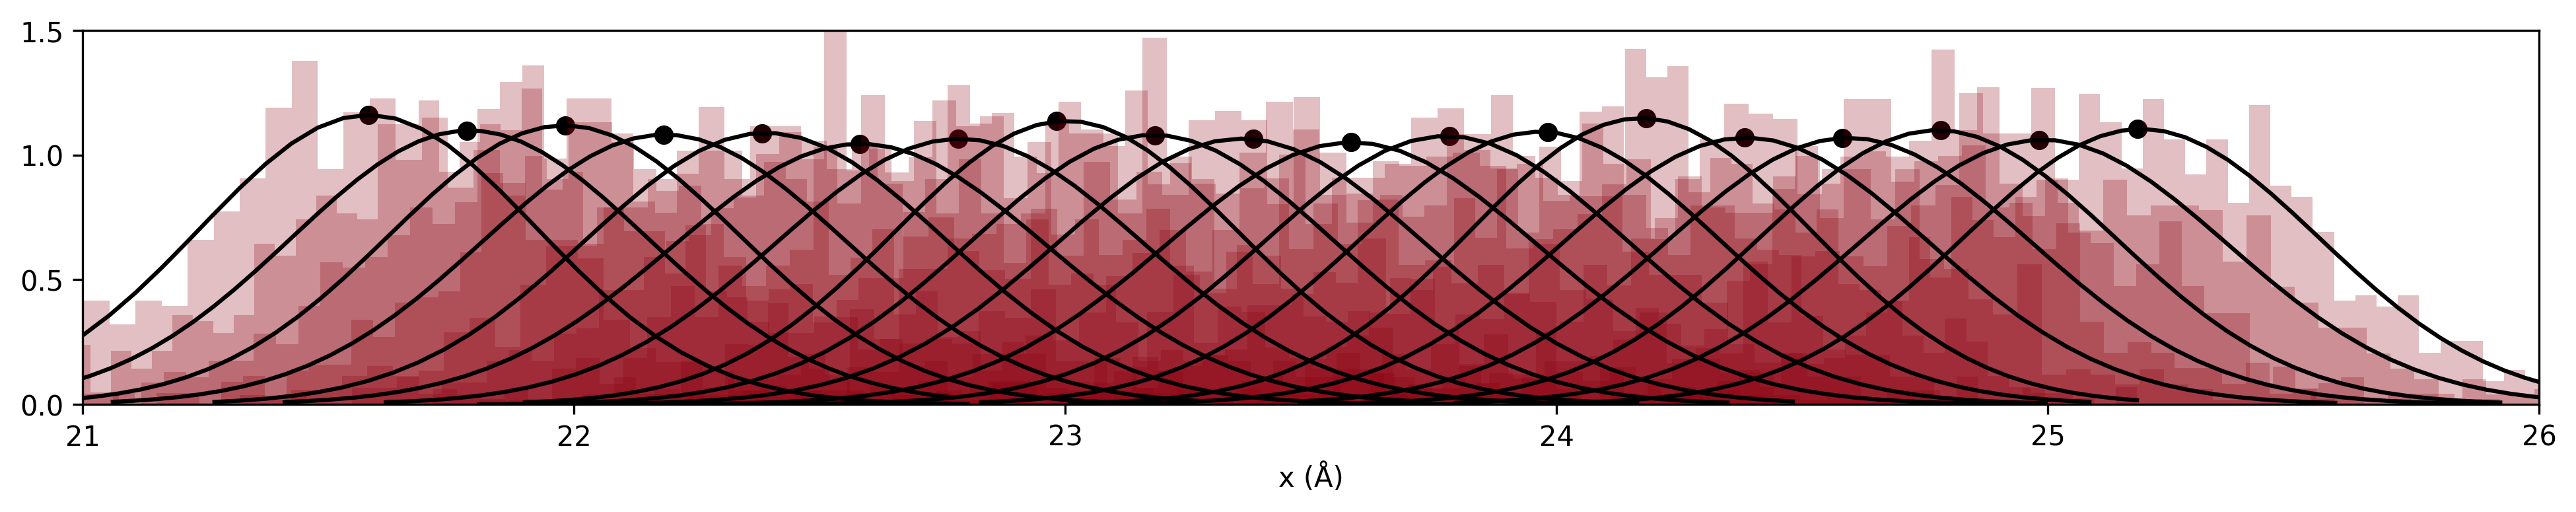

In [40]:
fig = plt.figure(figsize=(16, 2.5), dpi=300)
for i in range(19):
    idx = histdata['xi'].index(i)
    plot_hist(histdata['x'][idx], alpha=0.25, color='xkcd:crimson')
plt.xlabel('x (Å)')
plt.yticks([0, 0.5, 1.0, 1.5])
plt.xlim(21, 26)
plt.ylim(0, 1.5)

### Final positions

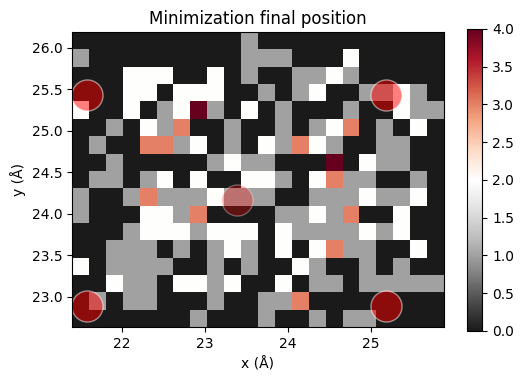

In [14]:
binsize = 0.2
nbins = (get_numbins(data['x'], binsize), get_numbins(data['y'], binsize))
H, xedges, yedges = np.histogram2d(data['x'], data['y'], bins=nbins)
H = H.T  # Let each row list bins with common y range.
plt.imshow(H, interpolation='nearest', origin='low', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='RdGy_r')
plt.colorbar()
plt.scatter([i[0] for i in surfatoms1], [i[1] for i in surfatoms1], c='r', alpha=0.5, s=500, edgecolors='w')
plt.scatter(surfatoms2[0], surfatoms2[1], c='r', alpha=0.3, s=500, edgecolors='w')
plt.xlabel('x (Å)')
plt.ylabel('y (Å)')
plt.title('Minimization final position')
# plt.title('Constrained NVT final position')

### Starting positions

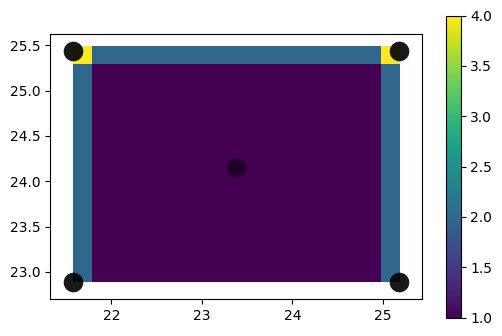

In [43]:
# xedges = np.arange(nx)
# yedges = np.arange(ny)
binsize = 0.2
nbins = (get_numbins(data['x0'], binsize), get_numbins(data['y0'], binsize))
H, xedges, yedges = np.histogram2d(data['x0'], data['y0'], bins=nbins)
H = H.T  # Let each row list bins with common y range.
plt.imshow(H, interpolation='nearest', origin='low', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.colorbar()
plt.scatter([i[0] for i in surfatoms1], [i[1] for i in surfatoms1], c='k', alpha=0.9, s=200, lw=0)
plt.scatter(surfatoms2[0], surfatoms2[1], c='k', alpha=0.5, s=200, lw=0)